In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [17]:
ctr = [2,2,3,3,4,5,5,6,4,8,6,6,9,11,12,12,15,16,20,25,27]
drug = [2,3,2,3,4,3,3,4,5,5,6,6,8,7,6,7,8,11,10,11,15]

week = []
for x in range(1,8):
   week += [x,x,x]
week += week

vals = ctr + drug

labels = ['Control']*21 + ['Drug_z']*21
df = pd.DataFrame(zip(vals,week, labels), columns=['Tumor size', 'Week', 'Treatment'])
df.head()

,Tumor size,Week,Treatment
0,2,1,Control
1,2,1,Control
2,3,1,Control
3,3,2,Control
4,4,2,Control


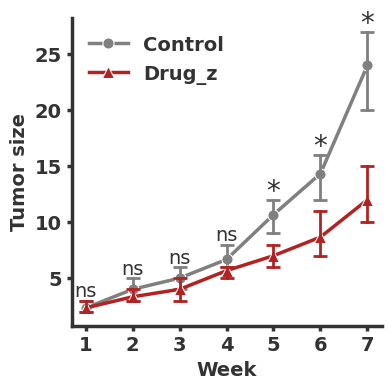

In [79]:
plt.figure(figsize=(4,4))

err_kws = {'capsize': 5, 'capthick': 2, 'elinewidth':2}
ax = sns.lineplot(data=df, x='Week', y='Tumor size', hue='Treatment',lw=2.5, style='Treatment', markers=['o', '^'], dashes=False, markersize=8, err_style='bars', err_kws=err_kws, palette=['gray','firebrick'])

for axis in ['bottom', 'left']:
   ax.spines[axis].set_linewidth(2.5)
   ax.spines[axis].set_color('0.2')
   
for axis in ['top', 'right']:
   ax.spines[axis].set_visible(False)

ax.tick_params(width=2.5, color='0.2')

plt.xticks(size=14, weight='bold', color='0.2')
plt.yticks(size=14, weight='bold', color='0.2')

ax.set_xlabel(ax.get_xlabel(), fontsize=14, weight='bold', color='0.2')
ax.set_ylabel(ax.get_ylabel(), fontsize=14, weight='bold', color='0.2')

plt.legend(frameon=False, prop={'weight': 'bold', 'size':14}, labelcolor='0.2')

for week in range(1,8):
   z = df[(df.Week == week) & (df.Treatment == 'Drug_z')]['Tumor size'].values
   c = df[(df.Week == week) & (df.Treatment == 'Control')]['Tumor size'].values
   
   p = stats.ttest_ind(z,c).pvalue # type: ignore
   max_v = df[df.Week == week]['Tumor size'].max()
   
   if p < 0.05:
      plt.text(x=week, y=max_v-0.5, s="*", fontsize=20, ha='center', va='bottom', color='0.2')
   else:
      plt.text(x=week, y=max_v, s="ns", fontsize=14, ha='center', va='bottom', color='0.2')

plt.savefig('line_test-1.png', bbox_inches='tight', dpi=250, facecolor=ax.get_facecolor())

In [70]:
for week in range(1,8):
   z = df[(df.Week == week) & (df.Treatment == 'Drug_z')]['Tumor size'].values
   c = df[(df.Week == week) & (df.Treatment == 'Control')]['Tumor size'].values
   
   p = stats.ttest_ind(z,c).pvalue # type: ignore
   max_v = df[df.Week == week]['Tumor size'].max()
   
   if p < 0.05:
      plt.text(x=week, y=max_v, s="*", fontsize=20, ha='center', va='bottom')
   else:
      plt.text(x=week, y=max_v, s="ns", fontsize=14, ha='center', va='bottom')

In [72]:
c

array([20, 25, 27])